# Test custom loss in Keras



In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K

from matplotlib import pyplot as plt
import numpy as np

print(tf.__version__)


2023-02-06 12:11:59.127639: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.11.0


In [184]:
class CustomModel(tf.keras.Model):
    def train_step(self, data):
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        if len(data) == 3:
            x, y, sample_weight = data
        else:
            sample_weight = None
            x, y = data

        # check if we passed the d_return
        if isinstance(x, tuple):
            x = x[0]
            d_return = x[1]


        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute the loss value.
            # The loss function is configured in `compile()`.
            # loss = self.compiled_loss(
            #     y,
            #     y_pred,
            #     sample_weight=sample_weight,
            #     regularization_losses=self.losses,
            # )
            y = tf.cast(y, tf.float32)
            loss = K.mean(K.square(y_pred - y), axis=-1)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics.
        # Metrics are configured in `compile()`.
        self.compiled_metrics.update_state(y, y_pred, sample_weight=sample_weight)

        # Return a dict mapping metric names to current value.
        # Note that it will include the loss (tracked in self.metrics).
        return {m.name: m.result() for m in self.metrics}

In [185]:
# Simplest NN without custom loss

x_input = Input(shape=(1,), name='x_input')
output = layers.Dense(1, activation=None)(x_input)

model = CustomModel(inputs=x_input, outputs=output, name='train_only')
model.compile(loss=None, optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

model.summary()

Model: "train_only"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 x_input (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_47 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [186]:
x = np.array([ [i] for i in range(1,100) ])
y = np.array([ [i] for i in range(1,100) ])

history = model.train_on_batch(x=(x,x),y=y)
# history = model.fit([x,x], y, epochs=700, verbose=0)
# history = model.fit(x, y, validation_split=0.2, epochs=500, verbose=0)


In [147]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylim(-0.1, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

AttributeError: 'float' object has no attribute 'history'

In [97]:
history.history['loss'][-1]

0.0

In [ ]:
pred = model.predict(x)
pred

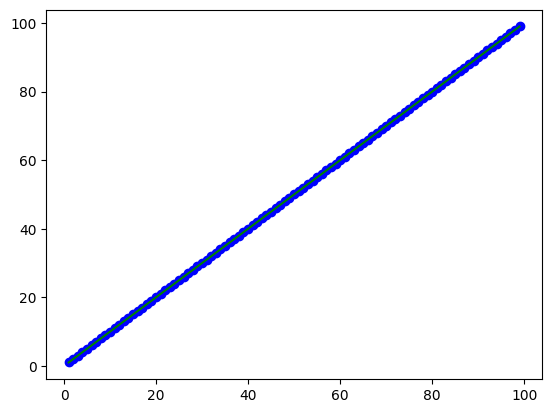

In [99]:

plt.scatter(x, y, c='blue')
plt.plot(x, pred, color='g')
plt.show()

In [ ]:
for i in np.arange(1.5,100.5, 1):
    print(i)